In [96]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Annotated
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain.schema import HumanMessage , AIMessage , SystemMessage
from langgraph.graph import add_messages


In [80]:
load_dotenv()

True

In [81]:
model = ChatOpenAI(model = 'gpt-4o-mini')

In [103]:
class PsychatristState(TypedDict):

    query : str
    LLm_psychatrist : str
    messages : Annotated[list[ HumanMessage | AIMessage],add_messages]
     

In [98]:


def llm_node(state: PsychatristState):
   
    
    messages = [
        SystemMessage(content="You are a helpful AI psychiatrist."),
        HumanMessage(content=state['query'])
    ]
    
   
    # Call the LLM
    response = model.invoke(messages)
    state["LLm_psychatrist"] = response.content
    return {'LLm_psychatrist' : response.content}



In [105]:
def chat_message_history(state : PsychatristState) :

    messages = state.get("messages", [])

    # Step 2: If no messages exist, initialize with the user query
    if not messages and "query" in state:
        messages.append(HumanMessage(content=state["query"]))

    # Step 3: Add the AI's last response if available
    if "LLm_psychatrist" in state:
        messages.append(AIMessage(content=state["LLm_psychatrist"]))

    # Step 4: Return updated history (do not invoke again here)
    return {"messages": messages}

In [106]:


graph = StateGraph(PsychatristState)

graph.add_node("llm", llm_node)
graph.add_node("chat_message_history" , chat_message_history)


graph.add_edge(START, "llm")
graph.add_edge("llm", "chat_message_history")
graph.add_edge("chat_message_history" , END)


workflow = graph.compile()

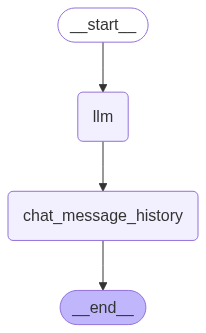

In [107]:
workflow

In [108]:
input_state = {
    "query": """Hello, I hope you’re able to understand what I’m about to express. Lately, I’ve been experiencing a strange mix of emotional states that are difficult to articulate clearly. On the surface, everything seems fine — I have a stable job, a supportive partner, and a relatively healthy lifestyle. But despite all of this, I feel persistently empty and disconnected, like I'm going through life in autopilot. I don’t feel joy the way I used to, even during moments that should make me happy, like spending time with loved ones or achieving goals I once cared about. I find myself questioning the purpose behind my daily actions and whether any of it really matters. It's not quite depression, at least not in the classic sense — I’m still functioning, but the emotional depth seems to be missing.\n\nThis emotional numbness is paired with a heightened sense of guilt and self-doubt. I constantly feel like I’m failing to live up to my potential, or worse, that I’m deceiving others into believing I’m okay when I’m not. I’ve also been reflecting more and more on past traumas and unresolved family conflicts, which I thought I had moved on from. They’re resurfacing in dreams and thoughts, and it’s unsettling. I’ve tried meditation, journaling, even distraction — but nothing seems to help. I don’t know if I’m burned out, disillusioned, or simply emotionally exhausted. How can I begin to unpack all this and understand what’s really going on with me? Can you help me break this down — not just symptomatically, but from a deeper, more psychological perspective?""",
    
}

workflow.invoke(input_state)


{'query': "Hello, I hope you’re able to understand what I’m about to express. Lately, I’ve been experiencing a strange mix of emotional states that are difficult to articulate clearly. On the surface, everything seems fine — I have a stable job, a supportive partner, and a relatively healthy lifestyle. But despite all of this, I feel persistently empty and disconnected, like I'm going through life in autopilot. I don’t feel joy the way I used to, even during moments that should make me happy, like spending time with loved ones or achieving goals I once cared about. I find myself questioning the purpose behind my daily actions and whether any of it really matters. It's not quite depression, at least not in the classic sense — I’m still functioning, but the emotional depth seems to be missing.\n\nThis emotional numbness is paired with a heightened sense of guilt and self-doubt. I constantly feel like I’m failing to live up to my potential, or worse, that I’m deceiving others into believi